In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
# Importing the dataset
wine_df = pd.read_csv(r'C:\Users\prash\OneDrive\Documents\GitHub\Machine-Learning\Datasets\wine_data.csv')

# printing the first few rows of our data

wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [33]:
wine_df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [34]:
# Seperating the features set and the target array

features = wine_df[['Class', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity','Hue','OD280/OD315','Proline']] 
features = features.to_numpy()    # converts feature set to numpy array
target = wine_df['Class'].to_numpy()    # converts target column to numpy array

In [35]:
#  Function for standardizing data
def standardScaler(feature_array):
    total_cols = feature_array.shape[1] # total number of columns 
    for i in range(total_cols): # iterating through each column
        feature_col = feature_array[:, i]
        mean = feature_col.mean() # mean stores mean value for the column
        std = feature_col.std() # std stores standard deviation value for the column
        feature_array[:, i] = (feature_array[:, i] - mean) / std # standard scaling of each element of the column
    return feature_array

In [36]:
# : Performing standardization on our feature set
features_scaled = standardScaler(features) 
features_scaled

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

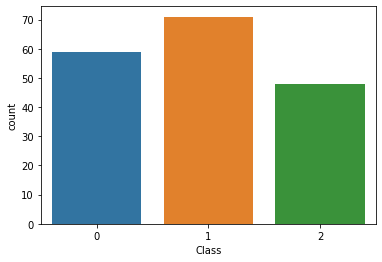

In [37]:
sns.countplot('Class', data = wine_df)

In [38]:
def train_test_split(features, target, test_size = 0.2):
    
    num_total_rows = features.shape[0] # total rows in the dataset
    
    num_test_rows = np.round(num_total_rows * test_size) # total rows in testing dataset
    
    rand_row_num = np.random.randint(0, int(num_total_rows), int(num_test_rows)) # randomly generated row numbers
    
    # train and test features
    test_features = np.array([features[i] for i in rand_row_num]) # creates test feature set
    train_features = np.delete(features, rand_row_num, axis = 0) # deletes test data rows from main dataset; making it training dataset

    # train and test target
    test_target = np.array([target[i] for i in rand_row_num]) # creates test target set
    train_target = np.delete(target, rand_row_num, axis = 0) # creates training target set
    
    return train_features, train_target, test_features, test_target 

In [39]:
# running split function on our dataset
X_train, y_train, X_test, y_test = train_test_split(features_scaled, target, test_size = 0.2)

# printing the shape of the splits
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((145, 14), (145,), (36, 14), (36,))

In [40]:
def euclidean_dist(pointA, pointB):
    
    distance = np.square(pointA - pointB) # (ai-bi)**2 for every point in the vectors
    distance = np.sum(distance) # adds all values
    distance = np.sqrt(distance) 
    return distance

In [41]:
def distance_from_all_training(test_point):
    
    dist_array = np.array([])
    for train_point in X_train:
        dist = euclidean_dist(test_point, train_point)
        dist_array = np.append(dist_array, dist)
    return dist_array

In [42]:
dist_array = distance_from_all_training(X_test[0])
dist_array

array([7.2966466 , 7.36082525, 8.87937525, 6.26259464, 7.95679386,
       7.42622955, 7.68706491, 7.85719336, 8.21464848, 6.83186168,
       6.95677134, 9.25185223, 7.33712133, 7.06808969, 8.64910212,
       7.08312423, 8.29312098, 7.37279661, 6.57512054, 6.81381576,
       6.63017171, 6.27989074, 7.16157377, 7.28072102, 7.57106218,
       7.61912312, 6.51192536, 7.38023093, 6.30193308, 6.90308228,
       6.42290718, 5.96026167, 6.53934273, 7.90035379, 7.72207498,
       5.77475377, 7.96101475, 5.61979208, 7.19042883, 6.37667747,
       7.59683601, 7.91123866, 7.02853887, 7.89910599, 8.45583432,
       7.15262997, 7.29056473, 7.57203143, 7.87641471, 6.9120874 ,
       8.09679177, 7.1010433 , 4.89669648, 4.63492731, 5.81658894,
       7.36626731, 5.23848816, 7.96149413, 6.24574858, 5.09680397,
       8.52240707, 4.10482695, 5.1843617 , 6.92488714, 6.61762389,
       3.97522965, 7.24344242, 6.71983008, 5.89053593, 5.3644461 ,
       3.1543329 , 6.33970522, 6.08124695, 4.91206245, 5.59746

In [43]:
def KNNClassifier(train_features, train_target, test_features, k = 5):
    
    predictions = np.array([])
    
    train_target = train_target.reshape(-1,1)
    
    for test_point in test_features: # iterating through every test data point 
        
        dist_array = distance_from_all_training(test_point).reshape(-1,1) # calculating distance from every training data instance
        
        neighbors = np.concatenate((dist_array, train_target), axis = 1) 
        
        neighbors_sorted = neighbors[neighbors[:, 0].argsort()] # sorts training points on the basis of distance
        
        k_neighbors = neighbors_sorted[:k] # selects k-nearest neighbors
        
        frequency = np.unique(k_neighbors[:, 1], return_counts=True)
        
        target_class = frequency[0][frequency[1].argmax()] # selects label with highest frequency
        
        predictions = np.append(predictions, target_class)
    
    return predictions

In [44]:
# running inference on the test data
test_predictions = KNNClassifier(X_train, y_train, X_test, k = 5)
test_predictions

array([2., 0., 2., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 2., 0.,
       0., 2., 1., 0., 0., 2., 2., 1., 1., 2., 0., 2., 2., 1., 0., 2., 2.,
       0., 2.])

In [45]:
def accuracy(y_test, y_preds):
    """Calculates inference accuracy of the model.
    
    Args-
        y_test- Original target labels of the test set
        y_preds- Predicted target lables
    Returns-
        acc
    """
    total_correct = 0
    for i in range(len(y_test)):
        if int(y_test[i]) == int(y_preds[i]):
            total_correct += 1
    acc = total_correct/len(y_test)
    return acc

In [46]:
acc = accuracy(y_test, test_predictions)
print('Model accuracy (Scratch) = ', acc)

Model accuracy (Scratch) =  0.9166666666666666


In [47]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN()
model.fit(X_train, y_train)
preds = model.predict(X_test)

acc = accuracy(y_test, preds)
print('Model accuracy (Sklearn) = ', acc)

Model accuracy (Sklearn) =  0.9166666666666666
